In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


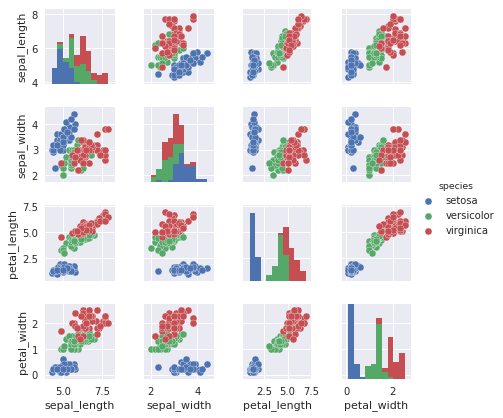

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()

sns.pairplot(iris, hue='species', size=1.5)

In [10]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

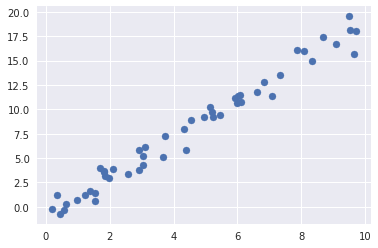

In [5]:
##simple linear regression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
model.coef_

array([ 1.9776566])

In [13]:
model.intercept_

-0.90331072553111635

In [14]:
xfit= np.linspace(-1, 11)

In [17]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

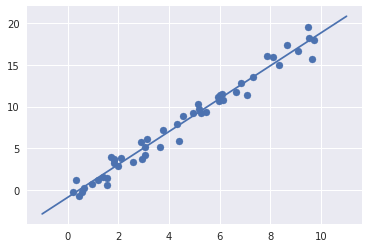

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [19]:
##iris classification
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

/home/siegmeyer/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
#1. choose model class
from sklearn.naive_bayes import GaussianNB

#2. instantiate model
model = GaussianNB()

#3. fit model to data
model.fit(Xtrain, ytrain)

#4. predict on new data
y_model = model.predict(Xtest)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

In [25]:
##reducing iris features from 4 to 2
#1. choose model class
from sklearn.decomposition import PCA

#2. instantiate the model with hyperparameters
model = PCA(n_components=2)

#3. fit the data
model.fit(X_iris)

#4. transform the data to two dimensions
X_2D = model.transform(X_iris)

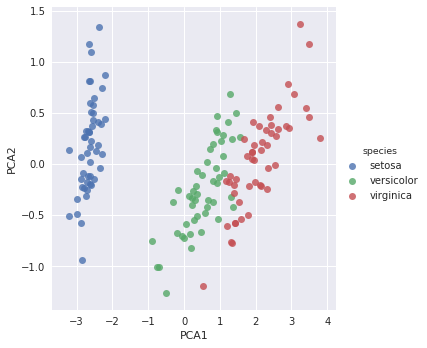

In [26]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

In [28]:
##clustering iris data
#1. choose model class
from sklearn.mixture import GMM

#2. instantiate model with hyperparameters
model = GMM(n_components=3, covariance_type='full')

#3. fit the data
model.fit(X_iris)

#4. determine cluster labels
y_gmm = model.predict(X_iris)

/home/siegmeyer/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/siegmeyer/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/siegmeyer/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/siegmeyer/anaconda3/lib/python3.6/site-packages/sklearn/util

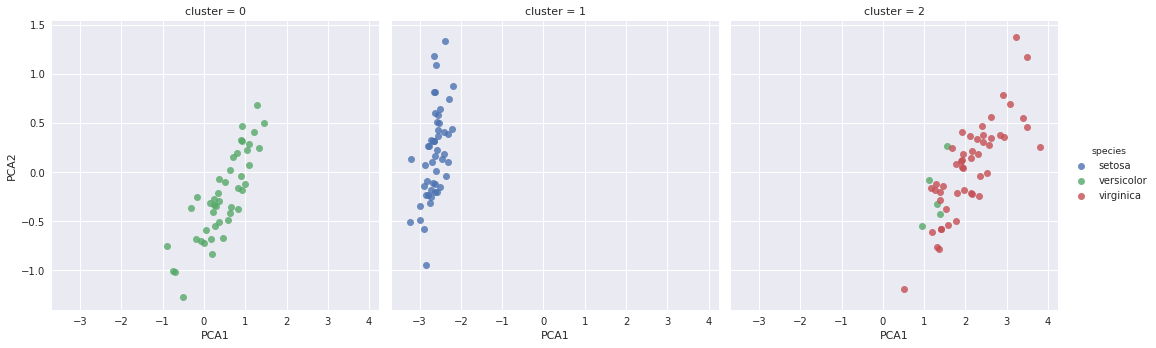

In [30]:
iris['cluster'] = y_gmm

sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

In [33]:
##handwritte digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

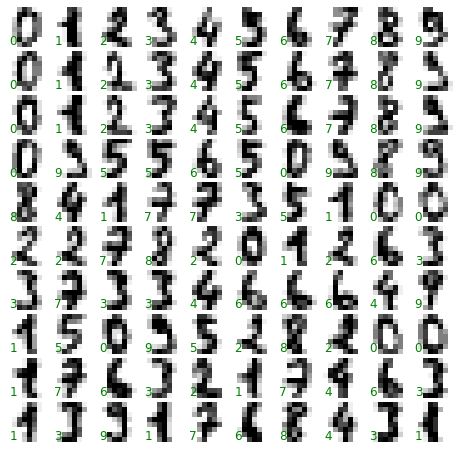

In [35]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [36]:
X = digits.data
X.shape

(1797, 64)

In [37]:
y = digits.target
y.shape

(1797,)

In [38]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)

data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

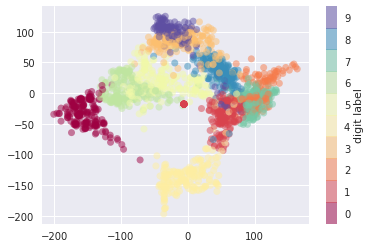

In [45]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [46]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [48]:
accuracy_score(ytest, y_model)

0.83333333333333337

Text(91.68,0.5,'true value')

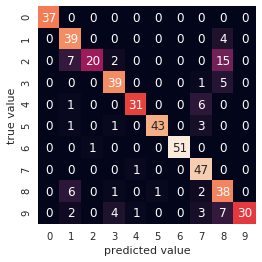

In [50]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

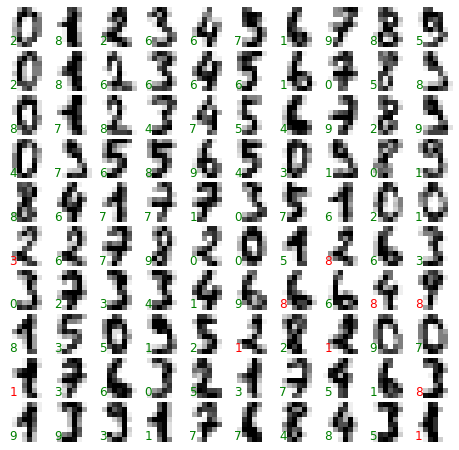

In [52]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')